<a href="https://colab.research.google.com/github/Ariotegar/viskom/blob/main/TrainToolsViskom.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CELL 1: Colab Mount

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# CELL 2: Inisialisasi YOLOv5

In [ ]:
!git clone https://github.com/ultralytics/yolov5  # clone
%cd yolov5
%pip install -qr requirements.txt comet_ml  # install

import torch
import utils
display = utils.notebook_init()  # checks

YOLOv5 🚀 v7.0-389-ge62a31b6 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (NVIDIA L4, 22700MiB)


Setup complete ✅ (12 CPUs, 53.0 GB RAM, 32.7/235.7 GB disk)


# CELL 3 (Opsional): Unzip Dataset

In [ ]:
!unzip -uq "/content/drive/MyDrive/AIStuff/toolsv1.zip" -d "/content/dataset"

# CELL 4: Pengecekan GPU

In [ ]:
!nvidia-smi

Mon Dec 16 13:22:48 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA L4                      Off | 00000000:00:03.0 Off |                    0 |
| N/A   42C    P8              16W /  72W |      4MiB / 23034MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

# CELL 5: Training

In [ ]:
# Training dataset menggunakan epoch 50
!python train.py --img 640 --batch 64 --epochs 50 --data /content/dataset/data.yaml --weights yolov5s6.pt --cache

2024-12-13 08:32:26.557315: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-12-13 08:32:26.578444: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-12-13 08:32:26.584723: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
train: weights=yolov5s6.pt, cfg=, data=/content/dataset/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=50, batch_size=64, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, evolve_population=data/hyps, resume_evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single

# CELL 6: Validasi Model

In [ ]:
!python val.py --data /content/dataset/data.yaml --weights /content/drive/MyDrive/AIStuff/YOLOv5ToolsDetectionResults/weights/best.pt

val: data=/content/dataset/data.yaml, weights=['/content/drive/MyDrive/AIStuff/YOLOv5ToolsDetectionResults/weights/best.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.6, max_det=300, task=val, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=exp, exist_ok=False, half=False, dnn=False
YOLOv5 🚀 v7.0-389-ge62a31b6 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (NVIDIA L4, 22700MiB)

Fusing layers... 
Model summary: 206 layers, 12327460 parameters, 0 gradients, 16.2 GFLOPs
val: Scanning /content/dataset/valid/labels... 236 images, 0 backgrounds, 0 corrupt: 100% 236/236 [00:00<00:00, 3409.32it/s]
val: New cache created: /content/dataset/valid/labels.cache
                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100% 8/8 [00:06<00:00,  1.26it/s]
                   all        236        298      0.838      0.851      0.841      0.464
         

# CELL 7: Test Deteksi dari hasil Training

In [ ]:
!python detect.py --data /content/dataset/data.yaml --weights /content/yolov5/runs/train/exp2/weights/best.pt

detect: weights=['/content/yolov5/runs/train/exp2/weights/best.pt'], source=data/images, data=/content/dataset/data.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_format=0, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-389-ge62a31b6 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (NVIDIA L4, 22700MiB)

Traceback (most recent call last):
  File "/content/yolov5/detect.py", line 437, in <module>
    main(opt)
  File "/content/yolov5/detect.py", line 432, in main
    run(**vars(opt))
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/_contextlib.py", line 116, in decorate_context
    return func(*args, **kwargs)
  File "/content/yolov5/detect.py", line 166, in run
    model 

# CELL 7A: Test Deteksi dari hasil Training yang disimpan di Drive

In [ ]:
from google.colab import files
import os

uploaded = files.upload()

filename = list(uploaded.keys())[0]

save_path = '/content/uploads/'
os.makedirs(save_path, exist_ok=True)
upload_path = os.path.join(save_path, filename)

with open(upload_path, 'wb') as f:
    f.write(uploaded[filename])

!python detect.py --source {upload_path} --weights /content/drive/MyDrive/AIStuff/YOLOv5ToolsDetectionResults/weights/best.pt

IndexError: list index out of range

# CELL 7B: Test Deteksi dari folder "Test" dari hasil Training yang disimpan di Drive

In [ ]:
!python detect.py --source /content/dataset/test/images --weights /content/drive/MyDrive/AIStuff/YOLOv5ToolsDetectionResults/weights/best.pt

detect: weights=['/content/drive/MyDrive/AIStuff/YOLOv5ToolsDetectionResults/weights/best.pt'], source=/content/dataset/test/images, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_format=0, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-389-ge62a31b6 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (NVIDIA L4, 22700MiB)

Fusing layers... 
Model summary: 206 layers, 12327460 parameters, 0 gradients, 16.2 GFLOPs
WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/5 /content/dataset/test/images/105_jpg.rf.96673c915105517fb527188ae88f44a6.jpg: 640x640 2 Handss, 1 Plier, 8.5ms
image 2/5 /content/dataset/test/images/108_jpg.rf.9f9c5e225d939090a90affd0fe58efcf.jpg: 640x640 

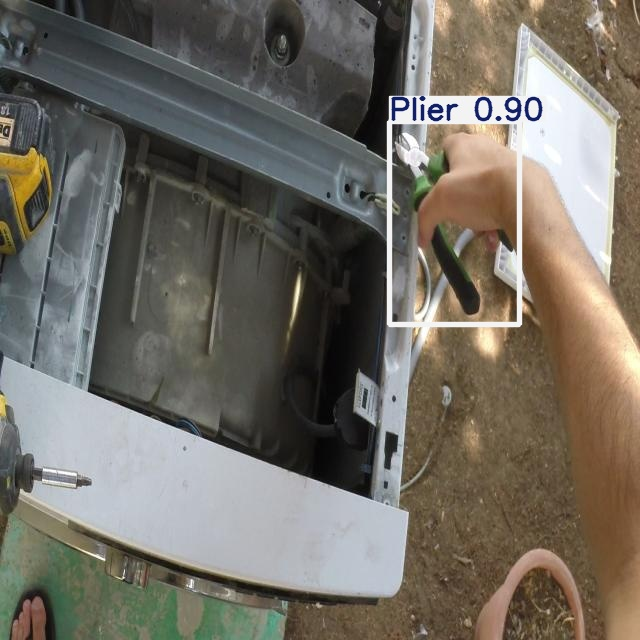

In [ ]:
import os
import random
from IPython.display import Image, display

image_folder = '/content/yolov5/runs/detect/exp2'
image_files = [f for f in os.listdir(image_folder) if os.path.isfile(os.path.join(image_folder, f))]

if image_files:
  random_image = random.choice(image_files)
  image_path = os.path.join(image_folder, random_image)
  display(Image(image_path))

# CELL 8: Zipping hasil model dan simpan drive

In [ ]:
!zip -r /content/drive/MyDrive/AIStuff/models.zip /content/yolov5/runs/train/exp2

  adding: content/yolov5/runs/train/exp2/ (stored 0%)
  adding: content/yolov5/runs/train/exp2/val_batch0_pred.jpg (deflated 8%)
  adding: content/yolov5/runs/train/exp2/P_curve.png (deflated 8%)
  adding: content/yolov5/runs/train/exp2/results.png (deflated 8%)
  adding: content/yolov5/runs/train/exp2/val_batch1_pred.jpg (deflated 9%)
  adding: content/yolov5/runs/train/exp2/hyp.yaml (deflated 45%)
  adding: content/yolov5/runs/train/exp2/train_batch2.jpg (deflated 2%)
  adding: content/yolov5/runs/train/exp2/weights/ (stored 0%)
  adding: content/yolov5/runs/train/exp2/weights/last.pt (deflated 9%)
  adding: content/yolov5/runs/train/exp2/weights/best.pt (deflated 9%)
  adding: content/yolov5/runs/train/exp2/F1_curve.png (deflated 7%)
  adding: content/yolov5/runs/train/exp2/labels_correlogram.jpg (deflated 36%)
  adding: content/yolov5/runs/train/exp2/results.csv (deflated 83%)
  adding: content/yolov5/runs/train/exp2/opt.yaml (deflated 50%)
  adding: content/yolov5/runs/train/exp2/